BigMart has collected sales data from the year 2013, for 1559 products across 10 stores in different cities. Where the dataset consists of 12 attributes like Item Fat, Item Type, Item MRP, Outlet Type, Item Visibility, Item Weight, Outlet Identifier, Outlet Size, Outlet Establishment Year, Outlet Location Type, Item Identifier and Item Outlet Sales. Out of these attributes response variable is the Item Outlet Sales attribute and remaining attributes are used as the predictor variables.

• Item_Identifier - Unique product ID. The FD stands for some food materials that can eat, DR stands for drinks, NC stands for Non-Commutable products. • Item_Weight – Weight of product • Item_Fat_Content – Whether the product is low fat or not • Item_Visibility – The % of total display area of all products in a store allocated to the particular product • Item_Type – The category to which the product belongs • Item_MRP – Maximum Retail Price (list price) of the product • Outlet_Identifier – Unique store ID • Outlet_Establishment_Year –The year in which store was established • Outlet_Size – The size of the store in terms of ground area covered • Outlet_Location_Type –The type of city in which the store is located • Outlet_Type – Whether the outlet is just a grocery store or some sort of supermarket • Item_Outlet_Sales – Sales of the product in the particular store. This one is the outcome variable to be predicted.

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np

#for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#for feature engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#for train and test set split
from sklearn.model_selection import train_test_split
from sklearn import metrics


from numpy import mean
from numpy import std

#for scaling
from sklearn.preprocessing import StandardScaler

# for models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score

#for evaluation
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.model_selection import KFold,cross_val_score

#To ignore warning messages
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings('ignore')

In [2]:
#Load the train and test dataset to python environment
train = pd.read_csv("train_v9rqX0R.csv")
test = pd.read_csv("test_AbJTz2l.csv")

## Data Analysis

In [3]:
#Number of rows and columns in train and testdataset
print(f"training set (rows, columns): {train.shape}\n\ntesting set (rows, columns): {test.shape}")

training set (rows, columns): (8523, 12)

testing set (rows, columns): (5681, 11)


In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
#checking the datatypes of each features
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
#checking the datatypes in test set 
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [8]:
#Checking basic information of columns
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
#Checking basic information of columns
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [10]:
# Lets check the missing values if any in train set
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
#to find th percentage of missing values in train set
train.isnull().sum()/train.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

 There are 1463 missing values (which is 17%) in Item_Weight and 2410 missing values(28%) in Outlet_Size which we'll have to either fill or drop to start further analysis.

In [12]:
#Lets check the missing values if any in test set
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [13]:
#to find th percentage of missing values in test set
test.isna().sum()/test.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

 There are 976 missing values (which is 17%) in Item_Weight and 1606 missing values(28%) in Outlet_Size which we'll have to either fill or drop to start further analysis.

## Data Cleaning

In [14]:
# Checking statistical summary of train datatset
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,8523,1559,FDW13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,7060.0,NaN,NaN,NaN,12.857645,4.643456,4.555,8.77375,12.6,16.85,21.35
Item_Fat_Content,8523,5,Low Fat,5089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,8523.0,NaN,NaN,NaN,0.066132,0.051598,0.0,0.026989,0.053931,0.094585,0.328391
Item_Type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,8523.0,NaN,NaN,NaN,140.992782,62.275067,31.29,93.8265,143.0128,185.6437,266.8884
Outlet_Identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,8523.0,NaN,NaN,NaN,1997.831867,8.37176,1985.0,1987.0,1999.0,2004.0,2009.0
Outlet_Size,6113,3,Medium,2793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Checking statistical summary of test datatset
test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,5681,1543,DRF48,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,4705.0,NaN,NaN,NaN,12.695633,4.664849,4.555,8.645,12.5,16.7,21.35
Item_Fat_Content,5681,5,Low Fat,3396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,5681.0,NaN,NaN,NaN,0.065684,0.051252,0.0,0.027047,0.054154,0.093463,0.323637
Item_Type,5681,16,Snack Foods,789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,5681.0,NaN,NaN,NaN,141.023273,61.809091,31.99,94.412,141.4154,186.0266,266.5884
Outlet_Identifier,5681,10,OUT027,624,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,5681.0,NaN,NaN,NaN,1997.828903,8.372256,1985.0,1987.0,1999.0,2004.0,2009.0
Outlet_Size,4075,3,Medium,1862,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,5681,3,Tier 3,2233,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations:

There are null values present in item weight and outlet_size ,as count less than total rows. The mean is less than median in Item_MRP.  Minimum value of Item_Visibility is zero which is not posiible so we will treat it as a null value.  Variance is almost zero in item visibility column and very high in item mrp. There are some outliers present as difference between min, max and interquartile range is unequal.  We have seen above that Item_Weight is a Numerical Feature So we can substitute mean value to fill the missing values.  Outlet_Size is a Categorical Feature so will use mode to impute the missing values in this column.

### Filling missing values:

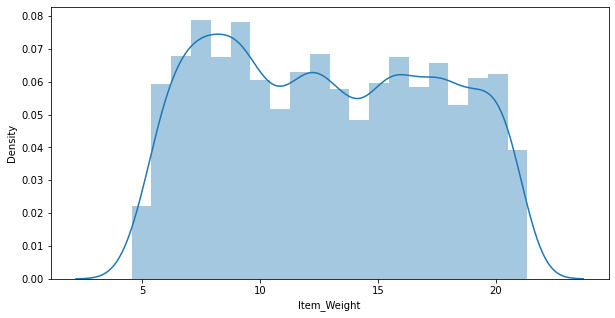

In [16]:
#plotting to find the distribution of Item_weight for filling missing values
fig=plt.subplots(figsize=(10,5))
sns.distplot(train['Item_Weight'])
plt.show()

In [17]:
# filling the missing values in the Item_Weight column using the Mean value
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace = True)

In [18]:
# filling the missing values in the Item_Weight column using the Mean value
test['Item_Weight'].fillna(test['Item_Weight'].mean(), inplace = True)

The Outlet_size and Outlet_Type are related to each other. So we can fill the missing values of the Outlet_Size by using the values in Outlet_Type.

In [19]:
# mode of the Outlet_size 
mode_outlet_size = pd.DataFrame(train.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: x.mode())))
mode_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [20]:
# filling the missing values of Outlet_Size with the mode values
train.loc[train['Outlet_Size'].isnull(), 'Outlet_Size'] = train.loc[train['Outlet_Size'].isnull(), 'Outlet_Type'].apply(lambda x: mode_outlet_size[x])

In [21]:
# filling the missing values of Outlet_Size with the mode values
test.loc[test['Outlet_Size'].isnull(), 'Outlet_Size'] = test.loc[test['Outlet_Size'].isnull(), 'Outlet_Type'].apply(lambda x: mode_outlet_size[x])

In [22]:
# checking the missing values in train set after handling those to reconfirm
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [23]:
# checking the missing values in test set after handling those to reconfirm
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Now all missing values in both train and test set are filled.

### Outliers

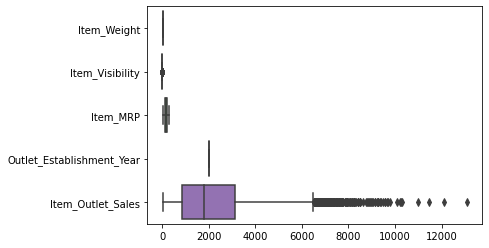

In [24]:
sns.boxplot(data= train, orient='h')
plt.show()

<AxesSubplot:xlabel='Item_Visibility'>

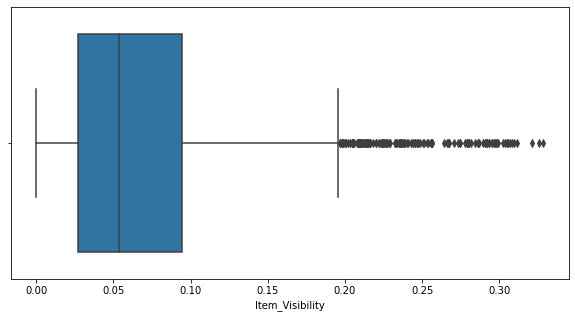

In [25]:
fig=plt.subplots(figsize=(10,5))     

sns.boxplot(train['Item_Visibility'],data=train)



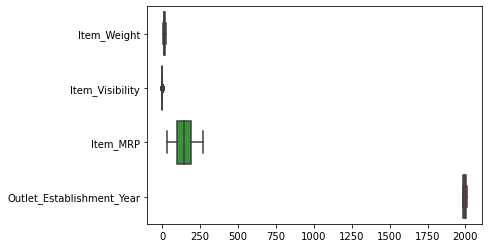

In [26]:
#test data outliers plotting
sns.boxplot(data= test, orient='h')
plt.show()

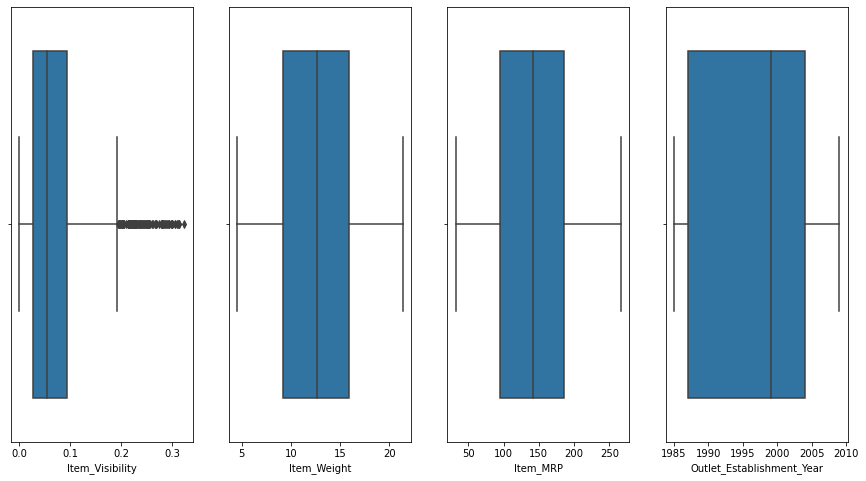

In [27]:
fig=plt.subplots(figsize=(15,8))     
plt.subplot(1,4,1)
sns.boxplot(test['Item_Visibility'],data=test)
plt.subplot(1,4,2)
sns.boxplot(test['Item_Weight'],data=test)
plt.subplot(1,4,3)
sns.boxplot(test['Item_MRP'],data=test)
plt.subplot(1,4,4)
sns.boxplot(test['Outlet_Establishment_Year'],data=test)
plt.show()

In both train and test set ther are outliers in Item_Visibility which we need to handle.
I am going to your replace option to handle them.

#### Handling Outliers in Item_visibility

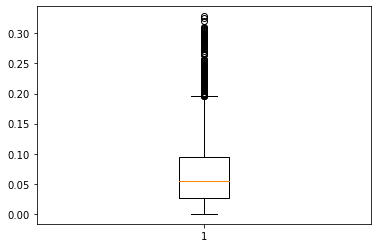

In [28]:
#Train set
plt.boxplot(train['Item_Visibility'])

plt.show()

In [29]:
#Using quantile method
Q1=np.percentile(train['Item_Visibility'],25,interpolation='midpoint')
Q2=np.percentile(train['Item_Visibility'],50,interpolation='midpoint')
Q3=np.percentile(train['Item_Visibility'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

0.0269894775 0.053930934 0.0945852925


In [30]:
iqr=Q3-Q1
iqr
low_limit=Q1-1.5*iqr
up_limit=Q3+1.5*iqr
print(low_limit,up_limit)

-0.07440424500000001 0.195979015


In [31]:
outliers1=[]
for i in train['Item_Visibility']:
    if(i>up_limit) or (i<low_limit):
        outliers1.append(i)

In [32]:
# Now let's replace the outliers by the maximum and minimum limit

train['Item_Visibility']= np.where(train['Item_Visibility'] > up_limit, up_limit,
                       np.where(train['Item_Visibility'] <low_limit,low_limit,train['Item_Visibility']))

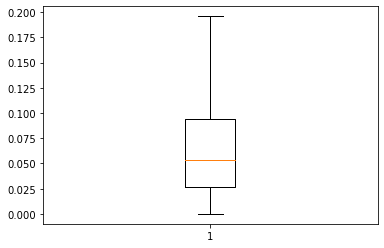

In [33]:
#After outlier replacement

plt.boxplot(train['Item_Visibility'])

plt.show()

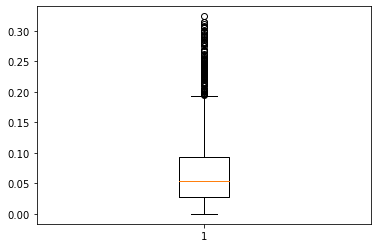

In [34]:
#Test data outliers

plt.boxplot(test['Item_Visibility'])

plt.show()

In [35]:
Q1=np.percentile(test['Item_Visibility'],25,interpolation='midpoint')
Q2=np.percentile(test['Item_Visibility'],50,interpolation='midpoint')
Q3=np.percentile(test['Item_Visibility'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

0.027046875 0.054154252 0.093462623


In [36]:
iqr=Q3-Q1
iqr
low_limit=Q1-1.5*iqr
up_limit=Q3+1.5*iqr
print(low_limit,up_limit)

-0.072576747 0.193086245


In [37]:
outliers1=[]
for i in test['Item_Visibility']:
    if(i>up_limit) or (i<low_limit):
        outliers1.append(i)

In [38]:
# Now let's replace the outliers by the maximum and minimum limit
test['Item_Visibility']= np.where(test['Item_Visibility'] > up_limit, up_limit,
                       np.where(test['Item_Visibility'] <low_limit,low_limit, test['Item_Visibility']))

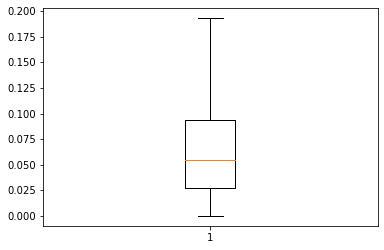

In [39]:
#After outlier handling

plt.boxplot(test['Item_Visibility'])

plt.show()

Now all outliers are handled

## Data Preprocessing

We can see both categorical and numerical columns in datasets.
Taking those separately for further preprocessing.


In [40]:
# creating list of categorical columns for  encoding
categorical_columns = [col for col in train.columns if train.dtypes[col] == 'object']
print('Categorical Features are : ',categorical_columns)

Categorical Features are :  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [41]:
# creating list of numerical columns to standardize data 
numerical_columns = [col for col in train.columns if train.dtypes[col] != 'object']
print('Numerical Features are : ',numerical_columns)

Numerical Features are :  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [42]:
#Checking the count of unique values in categorical features.
unique_categories_count_list = [{col:len(train[col].unique())} for col in categorical_columns]    
unique_categories_count_list

[{'Item_Identifier': 1559},
 {'Item_Fat_Content': 5},
 {'Item_Type': 16},
 {'Outlet_Identifier': 10},
 {'Outlet_Size': 3},
 {'Outlet_Location_Type': 3},
 {'Outlet_Type': 4}]

In [43]:
#Checking those unique values
unique_categories_list = [{col:train[col].unique()} for col in categorical_columns if col != 'Item_Identifier']        
unique_categories_list

[{'Item_Fat_Content': array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)},
 {'Item_Type': array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
         'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
         'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
         'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)},
 {'Outlet_Identifier': array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
         'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)},
 {'Outlet_Size': array(['Medium', 'Small', 'High'], dtype=object)},
 {'Outlet_Location_Type': array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)},
 {'Outlet_Type': array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
         'Supermarket Type3'], dtype=object)}]

There are repeating values in Item_Fat_Content column wit different name which we need to correct.

In [44]:
#replacing repeating ones with same meaning in train and test
train['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

test['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)


In [45]:
#lets check it now after replacing
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [46]:
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

Nomore repeated values 

In [47]:
#Further analysis on other features
train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [48]:
#creating our new column for both datasets
train['Outlet_Age'], test['Outlet_Age']= train['Outlet_Establishment_Year'].apply(lambda year: 2020 - year), test['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)

In [49]:
train['Outlet_Age'].head()

0    21
1    11
2    21
3    22
4    33
Name: Outlet_Age, dtype: int64

## Exploratory Data Analysis

### Univariate Analysis

#### Let us first visualize categorical features.

In [50]:
categorical_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

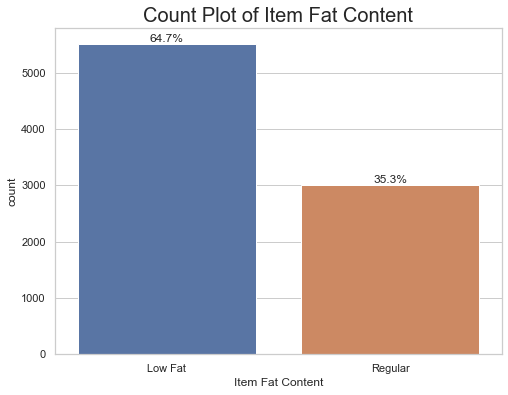

In [51]:
#Item_Fat_Content

sns.set(style="whitegrid")
plt.figure(figsize = (8,6))
total = float(len(train))
ax = sns.countplot(x = 'Item_Fat_Content',data=train)
plt.title('Count Plot of Item Fat Content', fontsize=20)
plt.xlabel('Item Fat Content')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='bottom')
plt.show()

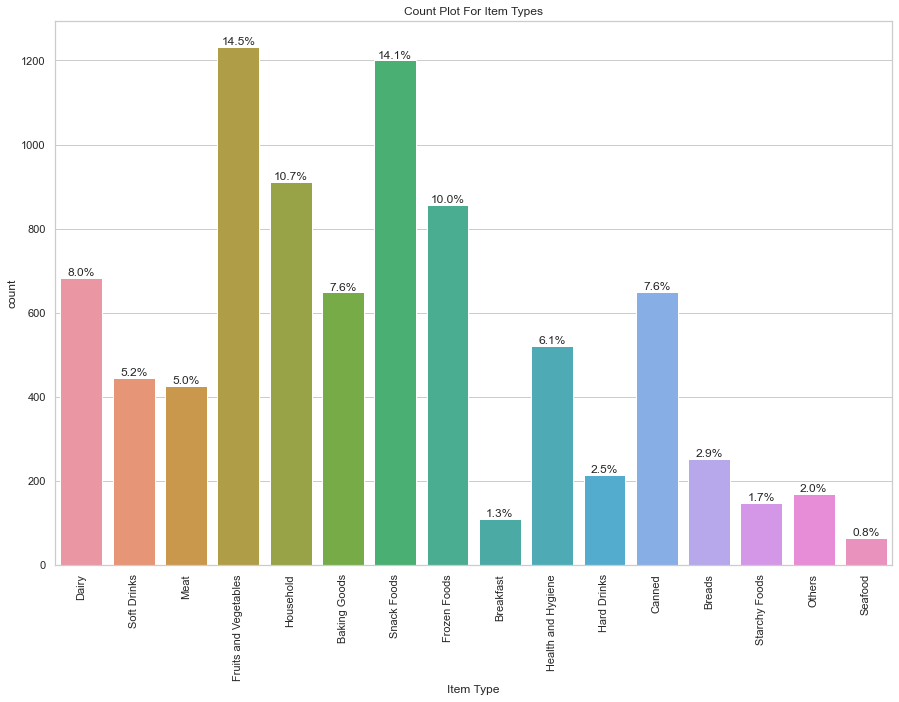

In [52]:
#Item_Type

plt.figure(figsize = (15,10))
total = float(len(train))
ax = sns.countplot(x = 'Item_Type',data=train)
plt.title('Count Plot For Item Types')
plt.xlabel('Item Type')
plt.xticks(rotation=90)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='bottom')
plt.show()

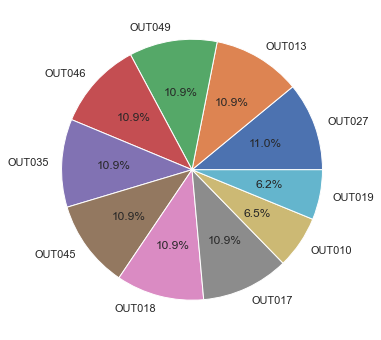

In [53]:
#Outlet_Identifier

plt.figure(figsize=(6,6))
train['Outlet_Identifier'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.show()

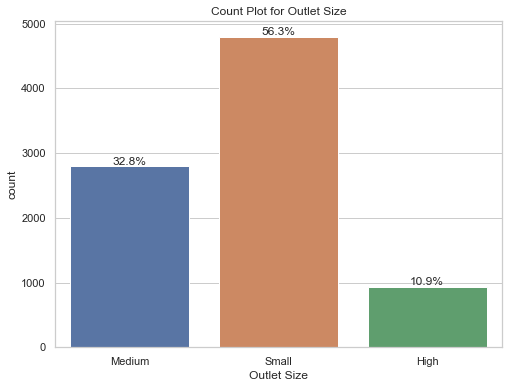

In [54]:
#Outlet_Size

plt.figure(figsize = (8,6))
total = float(len(train))
ax = sns.countplot(x = 'Outlet_Size',data=train)
plt.title('Count Plot for Outlet Size')
plt.xlabel('Outlet Size')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='bottom')
plt.show()

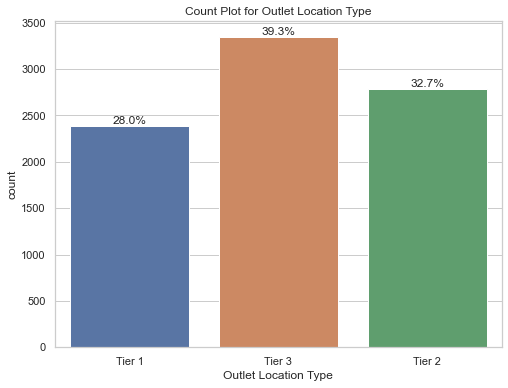

In [55]:
#Outlet_Location_Type

plt.figure(figsize = (8,6))
total = float(len(train))
ax = sns.countplot(x = 'Outlet_Location_Type',data=train)
plt.title('Count Plot for Outlet Location Type')
plt.xlabel('Outlet Location Type')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='bottom')
plt.show()

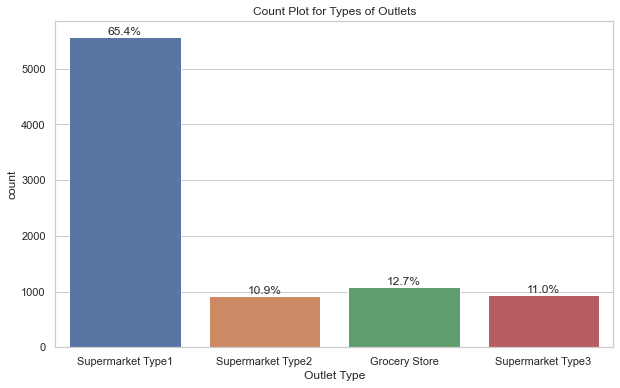

In [56]:
#Outlet_Type

plt.figure(figsize = (10,6))
total = float(len(train))
ax = sns.countplot(x = 'Outlet_Type',data=train)
plt.title('Count Plot for Types of Outlets')
plt.xlabel('Outlet Type')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='bottom')
plt.show()

Observations:

Item_Fat_Content- 64.7% of items sold are of Low fat content.

Item_Type- Top 2 items that are on good demand are Fruits and vegetables & Snack foods .

Outlet_Identifier-  Sold items are ditributed evenly among all outlets except OUT010 and OUT019 that are significanly lower.

Outlet_Size- Most of the outlets are small size

Outlet_Location_Type- Most of the stores are located in tier 3 cities.

Outlet_Type-SuperMarket Type1 is most number of outlet types category.

#### Let us visualize numerical features

In [57]:
numerical_columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

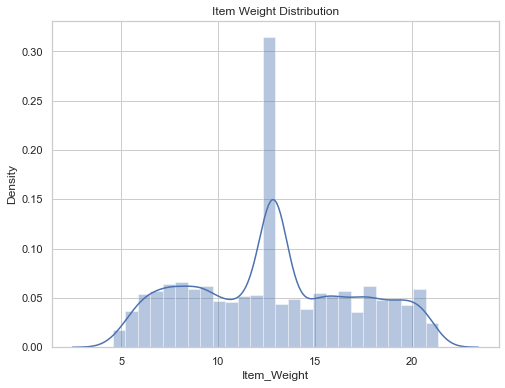

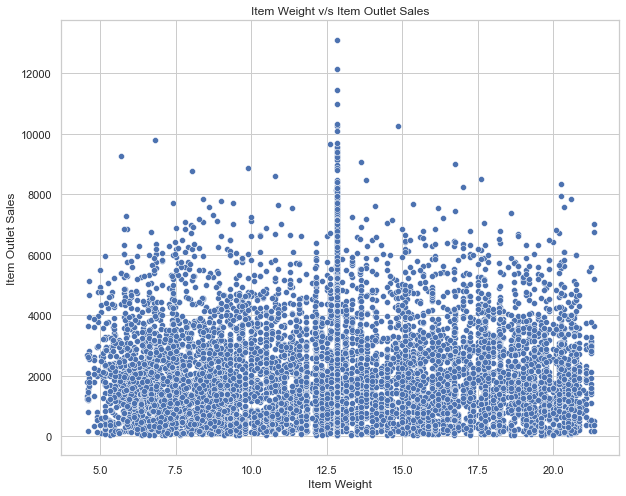

In [58]:
#Item_Weight

# Item_Weight Distribution
plt.figure(figsize = (8,6))
sns.distplot(train['Item_Weight'])
plt.title('Item Weight Distribution')
plt.show()

#Plotting against target 
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'Item_Weight', y = 'Item_Outlet_Sales',data=train)
plt.title('Item Weight v/s Item Outlet Sales')
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.show()

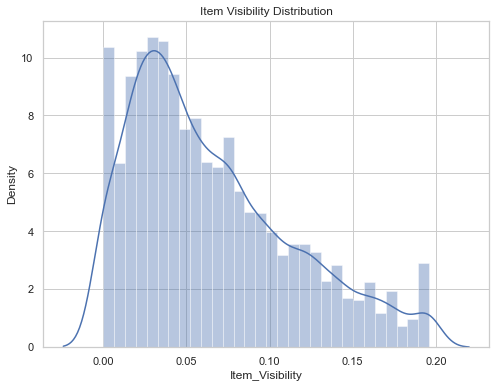

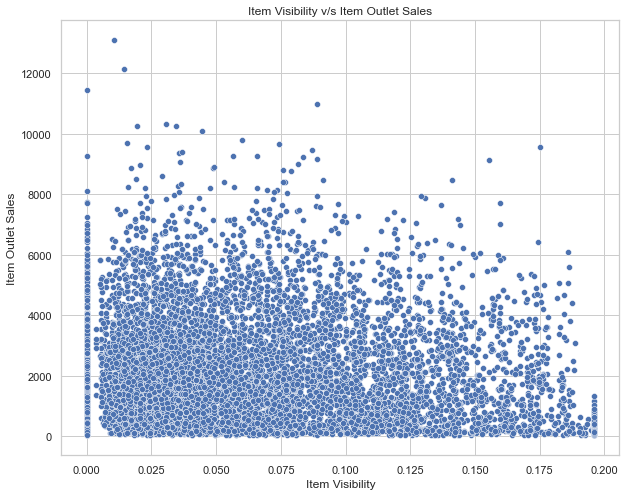

In [59]:
#Item_Visibility
plt.figure(figsize = (8,6))
sns.distplot(train['Item_Visibility'])
plt.title('Item Visibility Distribution')
plt.show()

#Plotting against target
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales',data=train)
plt.title('Item Visibility v/s Item Outlet Sales')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.show()

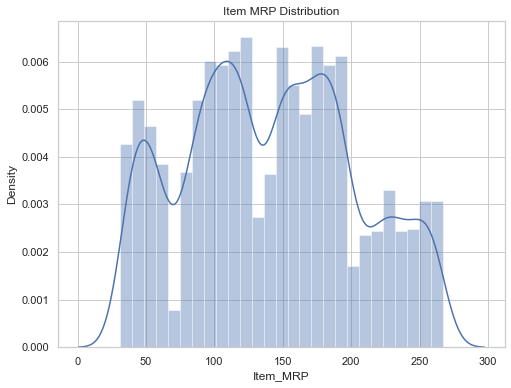

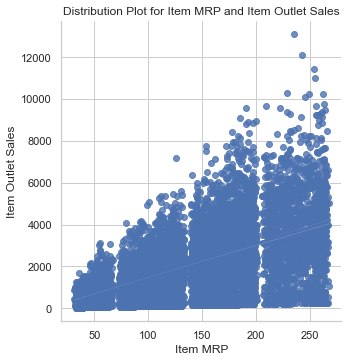

In [60]:
#Item_MRP
#distributio in dataset
plt.figure(figsize = (8,6))
sns.distplot(train['Item_MRP'])
plt.title('Item MRP Distribution')
plt.show()

#plotting against target
sns.lmplot(x='Item_MRP',y='Item_Outlet_Sales',data=train)
plt.title('Distribution Plot for Item MRP and Item Outlet Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

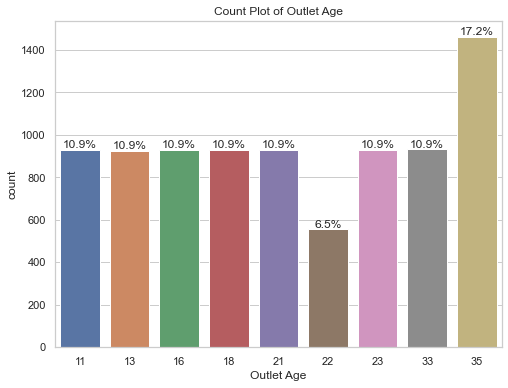

In [61]:
#Outlet_Establishment_Year which we are checking as Outlet Age.
plt.figure(figsize = (8,6))
total = float(len(train))
ax = sns.countplot(x = 'Outlet_Age',data=train)
plt.title('Count Plot of Outlet Age')
plt.xlabel('Outlet Age')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='bottom')
plt.show()

Observations:

Item_Weight- Item_Weight with range 13 is having the highest distribution.The data is evenly spread and no specific pattern.

Item_Visibility-Appears to be spreaded as well but some concentration around the (0,0) indicate small visibility items are not selling well is some cases.Item outlet sales sharply decreases for the most visible items.

Item_MRP-We can see the correlation between these two variables as the mrp of an item increases item outlet sales also increases.

# Bivariate Analysis 

#Sales per item type with Item outlet sales(target)

plt.figure(figsize=(27,10))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=train, palette="Blues_r")
plt.xlabel('Item_Type', fontsize=14)
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


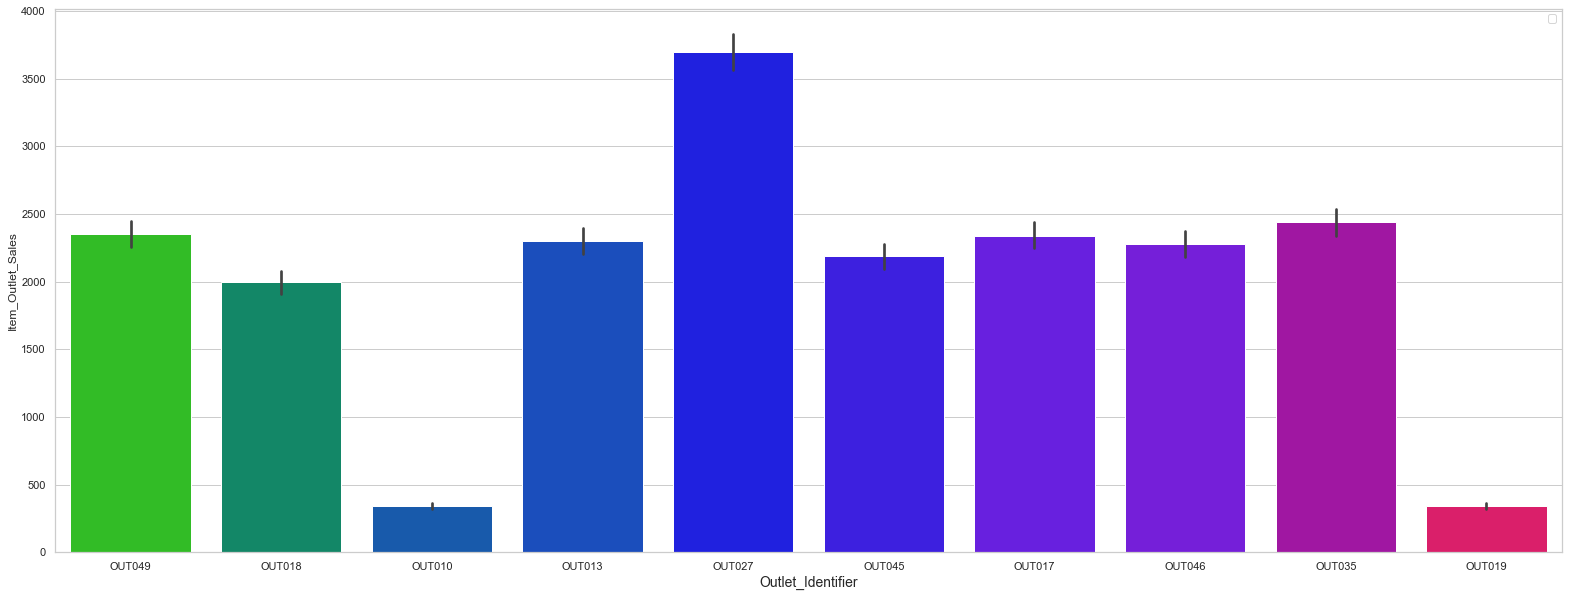

In [62]:
#Sales per Outlet

plt.figure(figsize=(27,10))
sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=train ,palette='prism_r')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


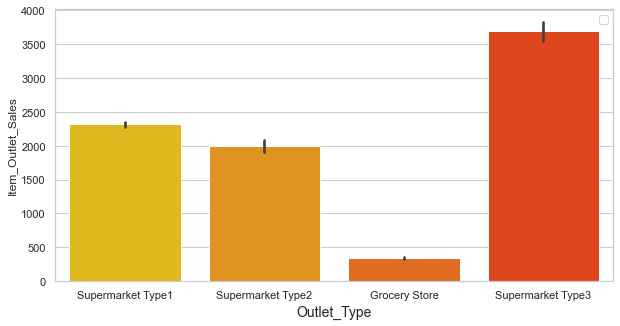

In [63]:
#Sales per Outlet_Type 
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Type' ,'Item_Outlet_Sales', data=train ,palette='autumn_r')
plt.xlabel('Outlet_Type', fontsize=14)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


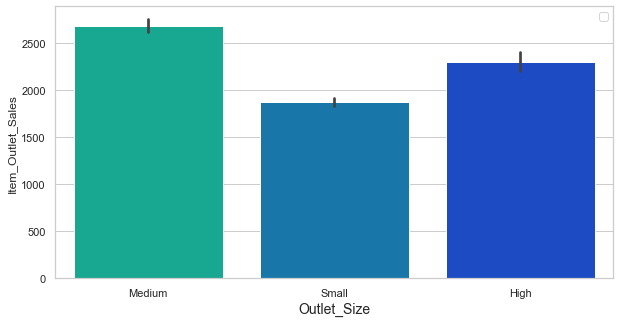

In [64]:
#Sales per Outlet_Size

plt.figure(figsize=(10,5))
sns.barplot('Outlet_Size' ,'Item_Outlet_Sales', data=train ,palette='winter_r')
plt.xlabel('Outlet_Size', fontsize=14)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


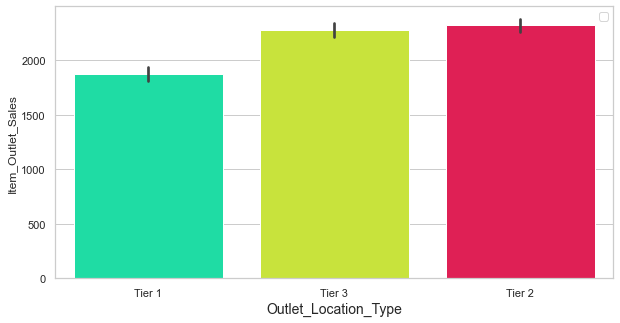

In [65]:
#Sales per Outlet location

plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type' ,'Item_Outlet_Sales', data=train ,palette='gist_ncar')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.legend()
plt.show()

Observations:

There is no much difference in item types as per sales.

OUT27 is the outlet which is highly profitable considering sales in all other outlets.

Supermarket Type3 is the Outlet type which is highly profitable.

Outlet with medium size is generating more profit when the least is given by small size outlets.


Outlet location is Tier 3 and Tier 2 are almost in same marging with respect to sales from those, with Tier2 slightly better than Tier3.

<AxesSubplot:>

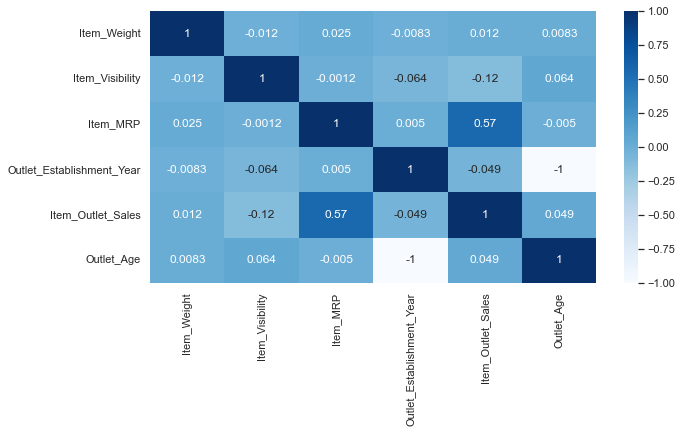

In [66]:
#Let us check the correlation 
plt.figure(figsize=(10,5))
sns.heatmap(train.corr(),annot=True,cmap='Blues')


Highly correlated ones are Item_Outlet_Sales and Item_MRP

## Feature Engineering

We have categorical features in our dataset which we need to encode to numerical values.

In [67]:
categorical_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [68]:
#Lets find the number of unique values in categorical features to encode accordingly.
cat_df=train[categorical_columns]
cat_df.apply(lambda x:x.nunique())

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

Out of all these we have 3 columns with ordinal and 4 nominal variables.

Ordinals are Item_Fat_Content,Outlet_Size,Outlet_Locatin_Type which can be Label encoded.

Nominals are Item_Identifier, Item_Type,Outlet_Identifier, Outlet_type which can be One Hot encoded.

Outlet_Establishment_Year and Item_Identifier  can be dropped as they are not providing much information to our data.

#### Label Encoding

In [69]:
#label encoding on train and test

le=LabelEncoder()
label=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for l in label:
    train[l]=le.fit_transform(train[l])
    test[l]=le.fit_transform(test[l])
  

In [70]:
#let us check it
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,21
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,11


#### One-Hot Encoding

In [71]:
#take the columns for encoding
oe_cols=['Item_Type','Outlet_Type','Outlet_Identifier']

#One-Hot Encoding
OE=OneHotEncoder(handle_unknown='ignore', sparse=False)

oe_train=pd.DataFrame(OE.fit_transform(train[oe_cols])).astype('int64')
oe_test=pd.DataFrame(OE.fit_transform(test[oe_cols])).astype('int64')


In [72]:
#feature columns
oe_train.columns=OE.get_feature_names(oe_cols)
oe_test.columns=OE.get_feature_names(oe_cols)

In [73]:
#adding index back to it
oe_train.index=train.index
oe_test.index=test.index

In [74]:
#Now lets add this one-hot encoded columns to main dataframes

fe_train=pd.concat([train,oe_train],axis=1)
fe_test=pd.concat([test,oe_test],axis=1)

#### Dropping not so important columns

In [75]:
fe_train=fe_train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
fe_test=fe_test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [76]:
fe_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0,0.016047,249.8092,1,0,3735.1380,21,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,1,0.019278,48.2692,1,2,443.4228,11,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,21,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,1,0.000000,182.0950,2,2,732.3800,22,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,33,0,0,...,0,1,0,0,0,0,0,0,0,0


In [77]:
fe_train.shape

(8523, 38)

In [78]:
fe_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales',
       'Outlet_Age', 'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier

In [79]:
fe_test.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Age',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Ide

In [80]:
fe_test.shape

(5681, 37)

## Machine learning models for prediction

Let us look at ML model for regression as our target is a continous variable.
Our target here is Item_Outlet_Sales.

In [81]:
#lets split dataset to X and y 

X=fe_train.drop('Item_Outlet_Sales',axis=1)
y=fe_train['Item_Outlet_Sales']

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [84]:
X_train.shape,y_train.shape

((6818, 37), (6818,))

In [85]:
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score

### Model 1-Linear regression

In [86]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [87]:
#model fitting and prediction
model_lr=lr.fit(X_train,y_train)
ypred_lr=model_lr.predict(X_test)

#### Evaluation

In [88]:
r2_score(y_test,ypred_lr)

0.5672340293814956

In [89]:
print("RMSE value of Linear regression model  is:",np.sqrt(mean_squared_error(y_test,ypred_lr)))

RMSE value of Linear regression model  is: 1113.0748148307223


### Model 2-Randon Forest regressor

In [90]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model_rf=rf.fit(X_train,y_train)

In [91]:
ypred_rf=model_rf.predict(X_test)

#### Evaluation

In [92]:
r2_score(y_test,ypred_rf)

0.5456440534439203

In [93]:
print("RMSE value of random forest regressor model  is:",np.sqrt(mean_squared_error(y_test,ypred_rf)))

RMSE value of random forest regressor model  is: 1140.5016357706136


### Model 3-Lasso regression

In [94]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1.0)
model_lasso=lasso.fit(X_train,y_train)
ypred_lasso=model_lasso.predict(X_test)

#### Evaluation

In [95]:
r2_score(y_test,ypred_lasso)

0.567763807270463

In [96]:
print("RMSE value of Lasso regression model is:",np.sqrt(mean_squared_error(y_test,ypred_lasso)))

RMSE value of Lasso regression model is: 1112.3933113811424


### Model 4-Ridge Regrassion

In [97]:
#finding best alpha
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
 
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-1282017.6183502371


In [98]:
ridge=Ridge(alpha=40)
model_ridge=ridge.fit(X_train,y_train)
ypred_ridge=model_ridge.predict(X_test)

#### Evaluation

In [99]:
r2_score(y_test,ypred_ridge)

0.5673125166868574

In [100]:
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,ypred_ridge)))

RMSE value is: 1112.9738755122212


### Model 5-Gradient Booster

In [101]:
from sklearn.ensemble  import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn import tree

In [102]:
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model
model = GradientBoostingRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -62.465 (3.244)


In [103]:
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)

gbr= GradientBoostingRegressor()
model_gbr=gbr.fit(X_train,y_train)
ypred_gbr=model_gbr.predict(X_test)


#### Evaluation

In [104]:
r2_score(y_test,ypred_gbr)

0.5987786503037682

In [105]:
print("RMSE value of Gradient Booster is:",np.sqrt(mean_squared_error(y_test,ypred_gbr)))

RMSE value of Gradient Booster is: 1071.740941696942


## Model 6- Decision Tree Regressor

In [106]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
model_dt=dt.fit(X_train,y_train)
ypred_dt=model_dt.predict(X_test)

#### Evaluation

In [107]:
r2_score(y_test,ypred_dt)

0.585400003332637

In [108]:
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,ypred_dt)))

RMSE value is: 1089.4629146225755


## Model 7- kNN regression

In [109]:
from sklearn.neighbors import KNeighborsRegressor

In [110]:
#finding best k
metric_k=[]       
neighbors=range(3,100,2)            

for k in neighbors:
    reg=KNeighborsRegressor(n_neighbors=k)
    reg=reg.fit(X_train,y_train)
    ypred_kNN=reg.predict(X_test)
    r2=r2_score(y_test,ypred_kNN)        
    metric_k.append(r2) 

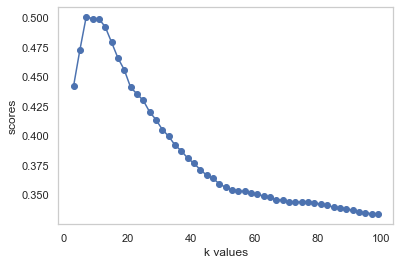

In [111]:
plt.plot(neighbors,metric_k,'o-') 
plt.xlabel('k values')
plt.ylabel('scores')
plt.grid()

In [112]:
metric_k

[0.4421689812716574,
 0.4728461672811941,
 0.5009462976982173,
 0.4993503633052202,
 0.49924182903160097,
 0.4923167627552938,
 0.4793045924400635,
 0.4660337776435517,
 0.4560330691926783,
 0.4412311081020661,
 0.4356218396677638,
 0.4301045037414539,
 0.4204044146458715,
 0.41383328426157995,
 0.4055146986649234,
 0.39981548065359673,
 0.3923436798097226,
 0.3874436899260496,
 0.381300992103882,
 0.37684457081060974,
 0.37149694651214626,
 0.3668176486677792,
 0.3641827482772044,
 0.35946965122510466,
 0.3565822896918406,
 0.35440971077738903,
 0.353462201416083,
 0.353143196526819,
 0.35176054942643664,
 0.3505696639639312,
 0.3493161965304582,
 0.3480769207350982,
 0.34592328089258495,
 0.34579909772754236,
 0.3438979571810654,
 0.3438132190994454,
 0.3444493700175201,
 0.34418702579281657,
 0.3433020623942076,
 0.3424201000552537,
 0.341299583646541,
 0.33992324016105024,
 0.33930688321039315,
 0.3382572469569338,
 0.33731819386252404,
 0.3356079636841446,
 0.3348609391578955,
 0.

In [113]:
knn=KNeighborsRegressor(n_neighbors=7)
model_knn=knn.fit(X_train,y_train)
ypred_knn=model_knn.predict(X_test)

#### Evaluation

In [114]:
r2_score(y_test,ypred_knn)

0.5009462976982173

In [115]:
print("RMSE value kNN is:",np.sqrt(mean_squared_error(y_test,ypred_knn)))

RMSE value kNN is: 1195.2849332733558


## Support Vector Machine

In [116]:
from sklearn.svm import SVR
svr= SVR(kernel = 'rbf')
model_svr=svr.fit(X_train, y_train)

In [117]:
ypred_svr=model_svr.predict(X_test)

In [118]:
r2_score(y_test,ypred_svr)

0.1889777496932885

In [119]:
print("RMSE value Support Vector Regressor model is:",np.sqrt(mean_squared_error(y_test,ypred_svr)))

RMSE value Support Vector Regressor model is: 1523.7516499525634


### Cross validation:

In [120]:
#Import necessary libraries
from sklearn.model_selection import cross_validate

In [121]:
#For Linear Regression
cvs_lr=cross_validate(model_lr,X,y,cv=10)
print('The cv score for Linear regression model is',cvs_lr['test_score'].mean())
#For Random Forest regressor
cvs_rf=cross_validate(model_rf,X,y,cv=10)
print('The cv score for Random Forest regression  model is',cvs_rf['test_score'].mean())
#For Lasso regression
cvs_lasso=cross_validate(model_lasso,X,y,cv=10)
print('The cv score for Lasso regression model is',cvs_lasso['test_score'].mean())
#For Ridge regression
cvs_ridge=cross_validate(model_ridge,X,y,cv=10)
print('The cv score for Ridge resgression model is',cvs_ridge['test_score'].mean())
#For Gradient Booster
cvs_gbr=cross_validate(model_gbr,X,y,cv=10)
print('The cv score for Gradient Booster regression model is',cvs_gbr['test_score'].mean())
cvs_dt=cross_validate(model_dt,X,y,cv=10)
print('The cv score for Decision tree regression model is',cvs_dt['test_score'].mean())
cvs_knn=cross_validate(model_knn,X,y,cv=10)
print('The cv score for kNearest neighbor regressor model is',cvs_knn['test_score'].mean())
cvs_svr=cross_validate(model_svr,X,y,cv=10)
print('The cv score for Support Vector machine regressor model is',cvs_svr['test_score'].mean())

The cv score for Linear regression model is 0.9999997965827403
The cv score for Random Forest regression  model is 0.7314909489668122
The cv score for Lasso regression model is 0.9996872061980481
The cv score for Ridge resgression model is 0.9981689736084647
The cv score for Gradient Booster regression model is 0.8703532270710408
The cv score for Decision tree regression model is 0.2885855869377224
The cv score for kNearest neighbor regressor model is 0.6407939897450838
The cv score for Support Vector machine regressor model is 0.08764526076177073


## Better Model as per cross validation

We can see Linear regression model is better model compared to other 4. So we can predict Item_Outlet_Sales on test data using Linear regression model.

In [122]:
#fitting model
lr=LinearRegression()
model_lr2=lr.fit(X_train,y_train)

In [123]:
#predicting values on test data
ypred_lr2=rf.predict(fe_test)
ypred_lr2

array([1856.2504  , 1469.367336,  646.338666, ..., 1924.8278  ,
       4632.43666 , 1433.620534])

In [124]:
#loading sample submission file
data_sub=pd.read_csv('sample_submission_8RXa3c6.csv')
data_sub

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [125]:
#dropping traget column 
data_sub=data_sub.drop('Item_Outlet_Sales',axis=1)
data_sub

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027
...,...,...
5676,FDB58,OUT046
5677,FDD47,OUT018
5678,NCO17,OUT045
5679,FDJ26,OUT017


In [126]:
#changing predictions to a DataFrame
ypred_lr2=pd.DataFrame(ypred_lr2,columns=['Item_Outlet_Sales'])
ypred_lr2

,Item_Outlet_Sales
0,1856.250400
1,1469.367336
2,646.338666
3,2447.800384
4,5934.987806
...,...
5676,2006.141954
5677,2549.368174
5678,1924.827800
5679,4632.436660


In [127]:
#Concatinating prediction values to submission file
data_sub=pd.concat([data_sub,ypred_lr2],axis=1)
data_sub

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1856.250400
1,FDW14,OUT017,1469.367336
2,NCN55,OUT010,646.338666
3,FDQ58,OUT017,2447.800384
4,FDY38,OUT027,5934.987806
...,...,...,...
5676,FDB58,OUT046,2006.141954
5677,FDD47,OUT018,2549.368174
5678,NCO17,OUT045,1924.827800
5679,FDJ26,OUT017,4632.436660


In [128]:
#setting index 
data_sub.set_index('Item_Identifier', inplace=True)
data_sub

,Outlet_Identifier,Item_Outlet_Sales
Item_Identifier,,
FDW58,OUT049,1856.250400
FDW14,OUT017,1469.367336
NCN55,OUT010,646.338666
FDQ58,OUT017,2447.800384
FDY38,OUT027,5934.987806
...,...,...
FDB58,OUT046,2006.141954
FDD47,OUT018,2549.368174
NCO17,OUT045,1924.827800


In [129]:
# saving the dataframe
data_sub.to_csv('Solution_submission2.csv')

Lets check if there is any change in model performance after scaling

## After scaling

In [130]:
# importing standard scaler
from sklearn.preprocessing import StandardScaler

In [131]:
#scaling done on num cols which are not encoded
num_cols=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']

sc=StandardScaler()
fe_train[num_cols]=sc.fit_transform(fe_train[num_cols])
fe_test[num_cols]=sc.fit_transform(fe_test[num_cols])

In [132]:
fe_train.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
count,8.523000e+03,8523.000000,8.523000e+03,8.523000e+03,8523.000000,8523.000000,8523.000000,8.523000e+03,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,3.127265e-16,0.352693,2.046872e-16,-1.644427e-16,1.453596,1.112871,2181.288914,-1.060886e-16,0.076030,0.029450,...,0.065118,0.109351,0.108647,0.108882,0.061950,0.109703,0.109117,0.108999,0.109117,0.109117
std,1.000059e+00,0.477836,1.000059e+00,1.000059e+00,0.683084,0.812757,1706.499616,1.000059e+00,0.265061,0.169073,...,0.246748,0.312098,0.311214,0.311509,0.241079,0.312538,0.311804,0.311656,0.311804,0.311804
min,-1.964716e+00,0.000000,-1.337208e+00,-1.761688e+00,0.000000,0.000000,33.290000,-1.334103e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.395053e-01,0.000000,-7.845791e-01,-7.574307e-01,1.000000,0.000000,834.247400,-7.368218e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.035383e-14,0.000000,-2.329331e-01,3.243893e-02,2.000000,1.000000,1794.331000,-1.395408e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.435985e-01,1.000000,5.994945e-01,7.170372e-01,2.000000,2.000000,3101.296400,1.293934e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.009608e+00,1.000000,2.675605e+00,2.021724e+00,2.000000,2.000000,13086.964800,1.532846e+00,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [133]:
#lets split dataset to X and y 

X=fe_train.drop('Item_Outlet_Sales',axis=1)
y=fe_train['Item_Outlet_Sales']

## Linear regression model

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [136]:
model_lr2=lr.fit(X_train,y_train)
ypred_lr2=model_lr2.predict(X_test)

In [137]:
r2_score(y_test,ypred_lr2)

0.5672575130078203

In [138]:
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,ypred_lr2)))

RMSE value is: 1113.0446144575303


No change in RMSE of Linear Regression even after scaling

## Random Forest

In [139]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model_rf2=rf.fit(X_train,y_train)
ypred_rf2=model_rf2.predict(X_test)

In [140]:
r2_score(y_test,ypred_rf2)

0.5444947289020592

In [141]:
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,ypred_rf2)))

RMSE value is: 1141.9432132749644


## Lasso regression

In [142]:

lasso=Lasso(alpha=1.0)
model_lasso2=lasso.fit(X_train,y_train)
ypred_lasso2=model_lasso2.predict(X_test)

In [143]:
r2_score(y_test,ypred_lasso2)

0.5680371557220714

In [144]:
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,ypred_lasso2)))

RMSE value is: 1112.0415140495063


## Ridge regression

In [145]:
ridge=Ridge(alpha=40)
model_ridge2=ridge.fit(X_train,y_train)
ypred_ridge2=model_ridge2.predict(X_test)

In [146]:
r2_score(y_test,ypred_ridge2)

0.5676337575867796

In [147]:
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,ypred_ridge2)))

RMSE value is: 1112.560645260939


## Gradient Booster Regression

In [148]:
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)

gbr= GradientBoostingRegressor()
model_gbr2=gbr.fit(X_train,y_train)
ypred_gbr2=model_gbr2.predict(X_test)

In [149]:
r2_score(y_test,ypred_gbr2)

0.5989609233284707

In [150]:
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,ypred_gbr2)))

RMSE value is: 1071.4974705370428


## Decision Tree Regression

In [151]:

dt=DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
model_dt2=dt.fit(X_train,y_train)
ypred_dt2=model_dt2.predict(X_test)

In [152]:
r2_score(y_test,ypred_dt2)

0.5854000033326371

In [153]:
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,ypred_dt2)))

RMSE value is: 1089.4629146225752


## kNearest Neighbors 

In [154]:
knn=KNeighborsRegressor(n_neighbors=7)
model_knn2=knn.fit(X_train,y_train)
ypred_knn2=model_knn2.predict(X_test)

In [155]:
r2_score(y_test,ypred_knn2)

0.5291455805164522

In [156]:
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,ypred_knn2)))

RMSE value is: 1161.023819641061


## Support vector machine regressor

In [157]:
from sklearn.svm import SVR
svr2= SVR(kernel = 'rbf')
model_svr2=svr2.fit(X_train, y_train)

In [158]:
ypred_svr2=model_svr2.predict(X_test)

In [159]:
r2_score(y_test,ypred_svr2)

0.08415347904451143

In [160]:
print("RMSE value of support Vector machine regressor  is:",np.sqrt(mean_squared_error(y_test,ypred_svr2)))

RMSE value of support Vector machine regressor  is: 1619.232284548284


## Cross validation

In [161]:
#For Linear Regression
cvs_lr2=cross_validate(model_lr2,X,y,cv=10)
print('The cv score for Linear regression model is',cvs_lr['test_score'].mean())
#For Random Forest regressor
cvs_rf2=cross_validate(model_rf2,X,y,cv=10)
print('The cv score for Random Forest regression  model is',cvs_rf['test_score'].mean())
#For Lasso regression
cvs_lasso2=cross_validate(model_lasso2,X,y,cv=10)
print('The cv score for Lasso regression model is',cvs_lasso['test_score'].mean())
#For Ridge regression
cvs_ridge2=cross_validate(model_ridge2,X,y,cv=10)
print('The cv score for Ridge resgression model is',cvs_ridge['test_score'].mean())
#For Gradient Booster
cvs_gbr2=cross_validate(model_gbr2,X,y,cv=10)
print('The cv score for Gradient Booster regression model is',cvs_gbr['test_score'].mean())
cvs_dt2=cross_validate(model_dt2,X,y,cv=10)
print('The cv score for Decision tree regression model is',cvs_dt['test_score'].mean())
cvs_knn2=cross_validate(model_knn2,X,y,cv=10)
print('The cv score for kNearest neighbor regressor model is',cvs_knn['test_score'].mean())
cvs_svr2=cross_validate(model_svr2,X,y,cv=10)
print('The cv score for Support vector machine regressor model is',cvs_svr['test_score'].mean())

The cv score for Linear regression model is 0.9999997965827403
The cv score for Random Forest regression  model is 0.7314909489668122
The cv score for Lasso regression model is 0.9996872061980481
The cv score for Ridge resgression model is 0.9981689736084647
The cv score for Gradient Booster regression model is 0.8703532270710408
The cv score for Decision tree regression model is 0.2885855869377224
The cv score for kNearest neighbor regressor model is 0.6407939897450838
The cv score for Support vector machine regressor model is 0.08764526076177073


## RMSE of models before scaling

In [162]:
print("RMSE value of Linear regression model  is:",np.sqrt(mean_squared_error(y_test,ypred_lr)))
print("RMSE value of Random forest regressor model  is:",np.sqrt(mean_squared_error(y_test,ypred_rf)))
print("RMSE value of Lasso regressor model  is:",np.sqrt(mean_squared_error(y_test,ypred_lasso)))
print("RMSE value of Ridge regressor model  is:",np.sqrt(mean_squared_error(y_test,ypred_ridge)))
print("RMSE value of Gradient Booster regression model  is:",np.sqrt(mean_squared_error(y_test,ypred_gbr)))
print("RMSE value of Decision Tree regression model  is:",np.sqrt(mean_squared_error(y_test,ypred_dt)))
print("RMSE value of kNearest Neighbors regressor model  is:",np.sqrt(mean_squared_error(y_test,ypred_knn)))
print("RMSE value of Support vector machine  regressor model  is:",np.sqrt(mean_squared_error(y_test,ypred_svr)))

RMSE value of Linear regression model  is: 1113.0748148307223
RMSE value of Random forest regressor model  is: 1140.5016357706136
RMSE value of Lasso regressor model  is: 1112.3933113811424
RMSE value of Ridge regressor model  is: 1112.9738755122212
RMSE value of Gradient Booster regression model  is: 1071.740941696942
RMSE value of Decision Tree regression model  is: 1089.4629146225755
RMSE value of kNearest Neighbors regressor model  is: 1195.2849332733558
RMSE value of Support vector machine  regressor model  is: 1523.7516499525634


## RMSE of models after Scaling

In [163]:
print("RMSE value of Linear regression model  is:",np.sqrt(mean_squared_error(y_test,ypred_lr2)))
print("RMSE value of Random forest regressor model  is:",np.sqrt(mean_squared_error(y_test,ypred_rf2)))
print("RMSE value of Lasso regressor model  is:",np.sqrt(mean_squared_error(y_test,ypred_lasso2)))
print("RMSE value of Ridge regressor model  is:",np.sqrt(mean_squared_error(y_test,ypred_ridge2)))
print("RMSE value of Gradient Booster regression model  is:",np.sqrt(mean_squared_error(y_test,ypred_gbr2)))
print("RMSE value of Decision Tree regression model  is:",np.sqrt(mean_squared_error(y_test,ypred_dt2)))
print("RMSE value of kNearest Neighbors regressor model  is:",np.sqrt(mean_squared_error(y_test,ypred_knn2)))
print("RMSE value of Support vector machine  regressor model  is:",np.sqrt(mean_squared_error(y_test,ypred_svr2)))

RMSE value of Linear regression model  is: 1113.0446144575303
RMSE value of Random forest regressor model  is: 1141.9432132749644
RMSE value of Lasso regressor model  is: 1112.0415140495063
RMSE value of Ridge regressor model  is: 1112.560645260939
RMSE value of Gradient Booster regression model  is: 1071.4974705370428
RMSE value of Decision Tree regression model  is: 1089.4629146225752
RMSE value of kNearest Neighbors regressor model  is: 1161.023819641061
RMSE value of Support vector machine  regressor model  is: 1619.232284548284


Before scaling and after scaling there is no much change in model performance as per corss validation
If we are considering RMSE then we can select Gradient Booster before scaling.

Let us predict test dataset traget using Gradient Booster as the RMSE of Gradient Booster is better than all other values.

In [164]:
#Fitting and predicting
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)

gbr= GradientBoostingRegressor()
model_gbr3=gbr.fit(X_train,y_train)
ypred_gbr3=model_gbr3.predict(fe_test)

In [165]:
ypred_gbr3

array([1519.94394293, 1403.52843162,  589.15563833, ..., 1868.65994644,
       3640.22336295, 1244.66458872])

In [166]:
#Loading submission file
data_sub2=pd.read_csv('sample_submission_8RXa3c6.csv')
data_sub2

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [167]:
#dropping traget column
data_sub2=data_sub2.drop('Item_Outlet_Sales',axis=1)
data_sub2

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027
...,...,...
5676,FDB58,OUT046
5677,FDD47,OUT018
5678,NCO17,OUT045
5679,FDJ26,OUT017


In [168]:
#Changing prediction values to a DataFrame
ypred_gbr3=pd.DataFrame(ypred_gbr3,columns=['Item_Outlet_Sales'])
ypred_gbr3

,Item_Outlet_Sales
0,1519.943943
1,1403.528432
2,589.155638
3,2549.136338
4,6087.612138
...,...
5676,2142.401343
5677,2451.911172
5678,1868.659946
5679,3640.223363


In [169]:
#Concatinating both
data_sub2=pd.concat([data_sub2,ypred_gbr3],axis=1)
data_sub2

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1519.943943
1,FDW14,OUT017,1403.528432
2,NCN55,OUT010,589.155638
3,FDQ58,OUT017,2549.136338
4,FDY38,OUT027,6087.612138
...,...,...,...
5676,FDB58,OUT046,2142.401343
5677,FDD47,OUT018,2451.911172
5678,NCO17,OUT045,1868.659946
5679,FDJ26,OUT017,3640.223363


In [170]:
#setting index
data_sub2.set_index('Item_Identifier', inplace=True)
data_sub2

,Outlet_Identifier,Item_Outlet_Sales
Item_Identifier,,
FDW58,OUT049,1519.943943
FDW14,OUT017,1403.528432
NCN55,OUT010,589.155638
FDQ58,OUT017,2549.136338
FDY38,OUT027,6087.612138
...,...,...
FDB58,OUT046,2142.401343
FDD47,OUT018,2451.911172
NCO17,OUT045,1868.659946


## Final Submissiom file

In [171]:
# saving the dataframe
data_sub2.to_csv('Solution_Submission(4).csv')

### This Gradient booster model was my final submission for which i got score-1154.8224662769


### Position on leaderboard -1809 